In [1]:
# import used tools


import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats

import time
print(tf.__version__)

2.17.0


In [2]:
# import the data for dim=6
# column ‘0’ is the target: robustness of coherence
# the rest columns are the matrix elements
# the filenames can be renamed in the matlab program which generates the data

dataset_path = 'yXcoherence6dmixed.csv'
dataset_path_1 = 'yXcoherence6dmixed_1.csv'
dataset_nonmarkov = 'yXcoherence6dmixed_2.csv'
dataset_nonmarkov1 = 'yXcoherence6_3dmixed.csv'
dataset_nonmarkov2 = 'yXcoherence6_4dmixed.csv'
dataset_nonmarkov3 = 'yXcoherence6_5dmixed.csv'
dataset_path_pure = 'yXcoherence6dpure.csv'


column_names=list(range(37))
column_names = [str(x) for x in column_names]
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      skipinitialspace=True)
raw_dataset_1 = pd.read_csv(dataset_path_1, names=column_names,
                      na_values = "?", comment='\t',
                      skipinitialspace=True)
raw_dataset_pure = pd.read_csv(dataset_path_pure, names=column_names,
                      na_values = "?", comment='\t',
                     skipinitialspace=True)

raw_nonmarkov = pd.read_csv(dataset_nonmarkov, names=column_names,
                      na_values = "?", comment='\t',
                     skipinitialspace=True)
raw_nonmarkov1 = pd.read_csv(dataset_nonmarkov1, names=column_names,
                      na_values = "?", comment='\t',
                     skipinitialspace=True)
raw_nonmarkov2 = pd.read_csv(dataset_nonmarkov2, names=column_names,
                      na_values = "?", comment='\t',
                     skipinitialspace=True)
raw_nonmarkov3 = pd.read_csv(dataset_nonmarkov3, names=column_names,
                      na_values = "?", comment='\t',
                     skipinitialspace=True)

raw_dataset = pd.concat([raw_dataset, raw_dataset_1, raw_nonmarkov, raw_nonmarkov1,raw_nonmarkov2,raw_nonmarkov3, raw_dataset_pure],ignore_index=True) #合并多个，重新排列index



dataset = raw_dataset.copy()
dataset.head()
dataset.shape

(601152, 37)

In [3]:
# To check for bad values in the data and remove those rows.

dataset.isna().sum()
dataset = dataset.dropna()

In [4]:
# To split the data into a training set and a test set.

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [5]:
# To check the size of the data.
test_dataset.shape


(120230, 37)

In [6]:
# To inspect the elements of the matrices in the training set.
train_stats = train_dataset.describe()
train_stats.pop("0")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
1,480919.0,0.166391,0.108778,2.109340e-11,0.091896,0.149396,0.219537,0.988188
2,480919.0,-0.000153,0.084389,-4.842035e-01,-0.045833,-0.000093,0.045846,0.496139
3,480919.0,-0.000057,0.084314,-4.949527e-01,-0.045706,0.000005,0.045668,0.494346
4,480919.0,-0.000084,0.084406,-4.867397e-01,-0.045852,0.000105,0.045670,0.486676
5,480919.0,-0.000019,0.084254,-4.879419e-01,-0.045977,-0.000058,0.045566,0.489949
6,480919.0,0.000106,0.084308,-4.831263e-01,-0.045596,0.000147,0.045969,0.496612
7,480919.0,-0.000153,0.084389,-4.842035e-01,-0.045833,-0.000093,0.045846,0.496139
8,480919.0,0.166940,0.108966,2.691920e-15,0.092201,0.150033,0.220764,0.987728
9,480919.0,0.000030,0.084298,-4.878045e-01,-0.045556,0.000134,0.045835,0.494252
10,480919.0,0.000050,0.084484,-4.899352e-01,-0.045761,0.000071,0.045848,0.491582


In [7]:
# To separate the target from the dataset.
train_labels = train_dataset.pop('0')
test_labels = test_dataset.pop('0')

In [8]:
# To normalize the data.
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset).fillna(0)
normed_test_data = norm(test_dataset).fillna(0)

In [9]:
# To build the model.
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),  
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.0001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [10]:
model = build_model()

C:\Users\zl95399\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(4,3),dpi=120)
  plt.xlabel('Epoch')
  plt.ylabel('MAE')
  plt.xticks(fontsize=12, fontname='Times New Roman')  
  plt.yticks(fontsize=12, fontname='Times New Roman')  
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error',color=(20/255,81/255,124/255),linestyle='--')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Validation Error',color=(200/255,36/255,35/255))
  plt.ylim([0.0,0.08])
  plt.legend()
  plt.savefig('d6MAE.eps',bbox_inches='tight')
 
    
 
  plt.figure(figsize=(4,3),dpi=120)

  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  

  plt.xticks(fontsize=12, fontname='Times New Roman')  
  plt.yticks(fontsize=12, fontname='Times New Roman')  
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error',color=(20/255,81/255,124/255),linestyle='--')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Validation Error',color=(200/255,36/255,35/255))
  plt.xlim([0,40])
  plt.ylim([0.000,0.012])

  plt.legend()
  
  
  plt.savefig('d6MSE.eps',bbox_inches='tight')
  plt.show()

In [13]:
# To train the model


class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
EPOCHS = 1000

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])




..................................................

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


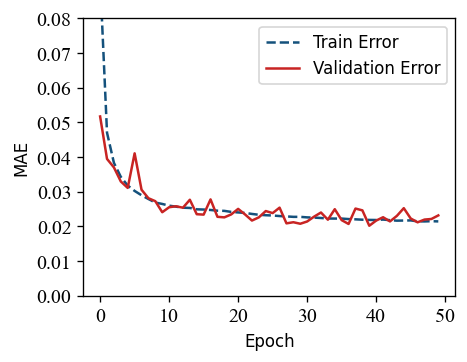

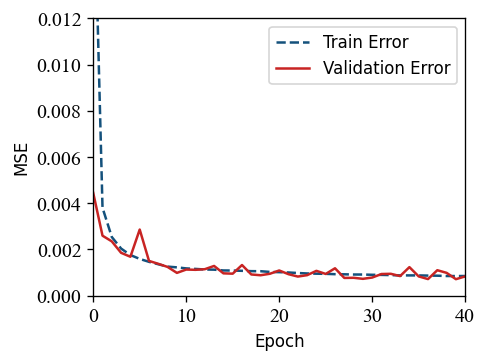

In [14]:
plot_history(history)

In [15]:
# To check the condition of the test set.

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

3758/3758 - 3s - 757us/step - loss: 9.7808e-04 - mae: 0.0232 - mse: 9.7808e-04
Testing set Mean Abs Error:  0.02


3758/3758 ━━━━━━━━━━━━━━━━━━━━ 3s 763us/step


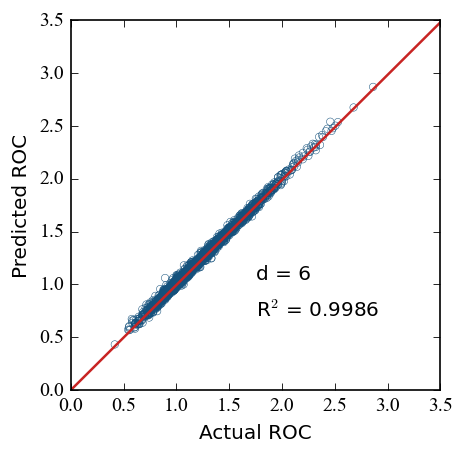

In [16]:
# check the performance of prediction


test_predictions = model.predict(normed_test_data).flatten()

r2 = round(1 - sum((test_labels - test_predictions) ** 2)/sum((test_labels - np.mean(test_labels)) ** 2),4)

plt.figure(figsize=(8,4),dpi=120)
plt.style.use('classic')

plt.text(1.75,1.05, "d = 6")
plt.text(1.75,0.7,"R$^2$ = " + str(r2) + "")


plt.scatter(test_labels[:2000], test_predictions[:2000],s=20,c='none',edgecolor=(20/255,81/255,124/255),marker="o",alpha=1,linewidth=0.3)

plt.xlabel('Actual ROC')
plt.ylabel('Predicted ROC')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,3.5])
plt.ylim([0,3.5])
plt.xticks(fontsize=12, fontname='Times New Roman')  
plt.yticks(fontsize=12, fontname='Times New Roman') 



plt.plot([0, 10.05], [0, 10],c=(200/255,36/255,35/255),lw=1.5,alpha=1)


plt.savefig('d6.eps',bbox_inches='tight')

plt.show()



In [20]:
# save the model

model.save('d6.keras')

In [21]:
# load the model

new_model = tf.keras.models.load_model('d6.keras')

C:\Users\zl95399\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
